oracle hidden number: 6 0b110
Final State Input bits: 00110
Final State Auxiliary bits: 1


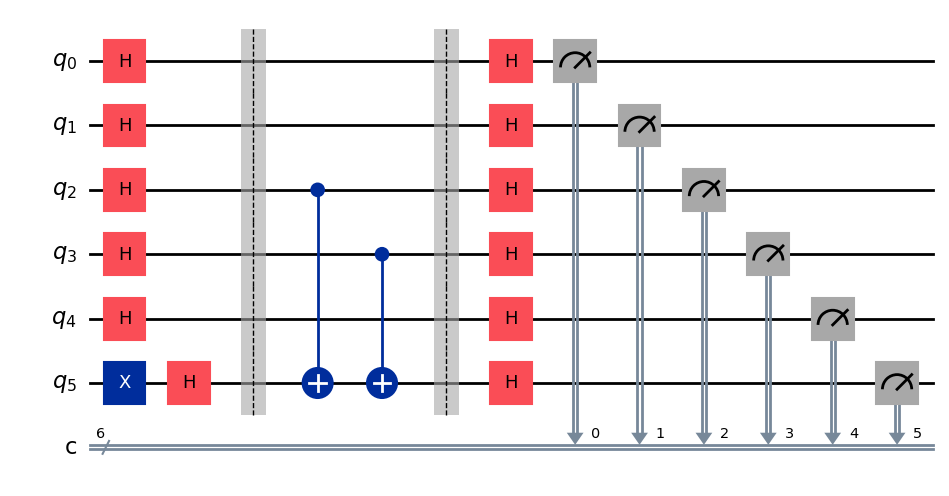

In [15]:
import qiskit
import matplotlib as mpl
from random import choice, randint

class QCBernsteinVaziraniOracle:
    def __init__(self) -> None:
        self.register_inp_size = 5 # the size of input, we assume the input is a number with 3-bits
        self.register_out_size = 1 # the size of the auxiliary (output) qbit
        self.register_size = self.register_inp_size + self.register_out_size
        self.bv_circuit = None

    def construct_circuit(self)->None:
        self.bv_circuit = qiskit.QuantumCircuit(self.register_size,self.register_size) # create Bernstein-Vazirani circuit

        for line in range(0,self.register_inp_size):
            self.bv_circuit.h(line)
        
        self.bv_circuit.x(self.register_inp_size)    #flip Auxiliary
        self.bv_circuit.h(self.register_inp_size)    #put into |-> state

        self.bv_circuit.barrier()
        oracle_type = self.bv_oracle(self.register_inp_size)
        self.bv_circuit.barrier()

        #after Oracle function
        for line in range(0,self.register_size):
            self.bv_circuit.h(line)    #apply Hadamard to each qubit
            self.bv_circuit.measure(line,line)    #measure qubit onto respective bit

    def bv_oracle(self,n)->None:     #begin our function
        oracle_hidden_num = randint(0,(2**n)-1)    #random binary num between
        print('oracle hidden number:', oracle_hidden_num , str(bin(oracle_hidden_num)))
        oracle_num_bin = format(oracle_hidden_num , '0'+str(n)+'b')

        for reg in range(0,len(oracle_num_bin)):   #iterate through flipGates
            if oracle_num_bin[reg] == '1':
                self.bv_circuit.cx(reg,n)     #flip qubit if necessary

    def simulate(self)->None:
        from qiskit_aer import AerSimulator

        simulator = AerSimulator()
        job = simulator.run(self.bv_circuit,shots=1,memory=True)
        result = job.result()
        measurements = result.get_memory()[0]   #e.g '0000'
        out_query_state = measurements[::-1] #gets the state of the lines in a reverse order
        print('Final State Input bits:', out_query_state[:self.register_inp_size])
        print('Final State Auxiliary bits:', out_query_state[self.register_inp_size:])
        
    def run_oracle(self):
        self.construct_circuit()
        self.simulate() # error
        

oracle = QCBernsteinVaziraniOracle()
oracle.run_oracle()
oracle.bv_circuit.draw('mpl')


